In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

kaggle/input/t10k-images-idx3-ubyte.gz
kaggle/input/train-images-idx3-ubyte.gz
kaggle/input/fashion-mnist_train.csv
kaggle/input/fashion-mnist_test.csv
kaggle/input/train-labels-idx1-ubyte.gz
kaggle/input/t10k-labels-idx1-ubyte.gz


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [10]:
train = pd.read_csv('kaggle/input/fashion-mnist_train.csv')
test = pd.read_csv('kaggle/input/fashion-mnist_test.csv')

In [11]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.shape

(60000, 785)

In [14]:
test.shape

(10000, 785)

In [15]:
training_array = np.array(train,dtype='float32')

In [16]:
testing_array = np.array(test,dtype = 'float32')

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

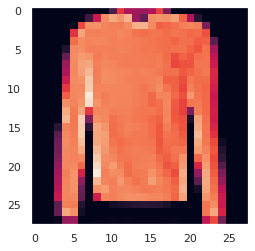

The image is for : Pullover


In [18]:
i = random.randint(1,60000)
plt.figure()
plt.imshow(training_array[i,1:].reshape(28,28))
plt.grid(False)
plt.show()
label = int(training_array[i,0])
print(f'The image is for : {class_names[label]}')

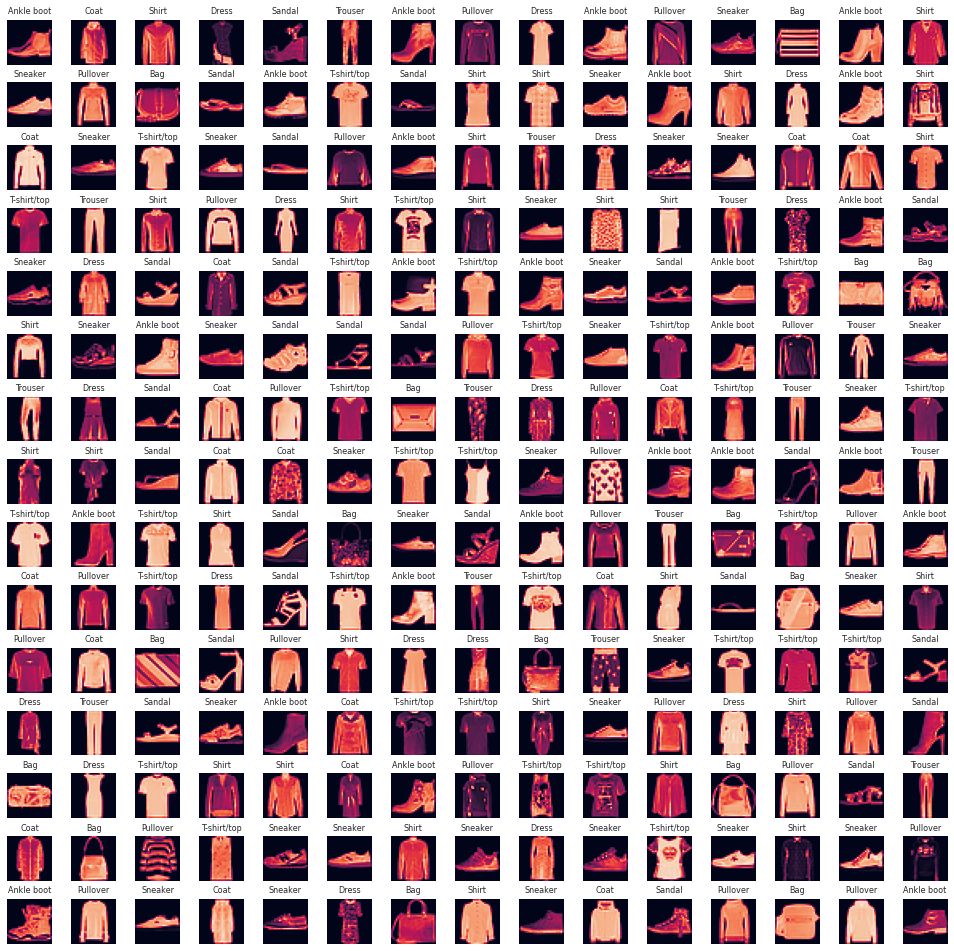

In [19]:
W_grid = 15
L_grid = 15

# subplot return the figure and axes object
# And by using axes object we can plot specific figure at various location
fig , axes = plt.subplots(L_grid,W_grid,figsize=(17,17))  
axes = axes.ravel()          #Flaten the 15 * 15 matrix into 255 array 


n_training = len(training_array)  #get the length of training dataset


for i in np.arange(0,L_grid*W_grid):
    
    index = np.random.randint(0,n_training)
    axes[i].imshow(training_array[index,1:].reshape(28,28))
    axes[i].set_title(class_names[int(training_array[index,0])],fontsize=8)
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.4)

In [20]:
X_train = training_array[:,1:]/255
y_train = training_array[:,0]

In [21]:
X_test = testing_array[:,1:]/255
y_test = testing_array[:,0]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train ,X_validate , y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

In [24]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_validate = X_validate.reshape(X_validate.shape[0],28,28,1)

In [25]:
print(f'shape of X train : {X_train.shape}')
print(f'shape of X test : {X_test.shape}')
print(f'shape of X validate : {X_validate.shape}')

shape of X train : (48000, 28, 28, 1)
shape of X test : (10000, 28, 28, 1)
shape of X validate : (12000, 28, 28, 1)


In [26]:
print(f'shape of y train : {y_train.shape}')
print(f'shape of y test : {y_test.shape}')
print(f'shape of y validate : {y_validate.shape}')

shape of y train : (48000,)
shape of y test : (10000,)
shape of y validate : (12000,)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [28]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_validate = to_categorical(y_validate,num_classes=10)

In [29]:
print(f'shape of y train : {y_cat_train.shape}')
print(f'shape of y test : {y_cat_test.shape}')
print(f'shape of y validate : {y_cat_validate.shape}')

shape of y train : (48000, 10)
shape of y test : (10000, 10)
shape of y validate : (12000, 10)


In [31]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [33]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [41]:
model.fit(X_train,
         y_cat_train,
         epochs=50,
          verbose=1,
         validation_data=(X_validate,y_cat_validate),
         callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1868 - accuracy: 0.9276 - val_loss: 0.2671 - val_accuracy: 0.9105
Epoch 2/50
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1805 - accuracy: 0.9303 - val_loss: 0.2544 - val_accuracy: 0.9145
Epoch 3/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1738 - accuracy: 0.9340 - val_loss: 0.2527 - val_accuracy: 0.9136
Epoch 4/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1636 - accuracy: 0.9364 - val_loss: 0.2622 - val_accuracy: 0.9154


In [42]:
model_history = pd.DataFrame(model.history.history)

In [43]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.186829,0.927583,0.267116,0.910500
1,0.180495,0.930333,0.254357,0.914500
2,0.173780,0.934021,0.252659,0.913583
3,0.163577,0.936375,0.262191,0.915417


<AxesSubplot:>

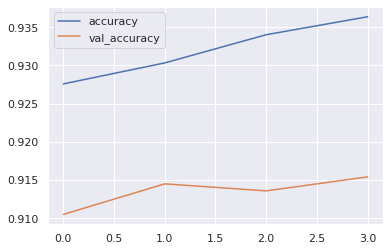

In [44]:
model_history[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

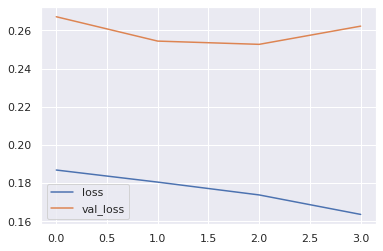

In [45]:
model_history[['loss','val_loss']].plot()

In [46]:
evalution = model.evaluate(X_test,y_cat_test)
print(f'Test Accuracy : {evalution[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2578 - accuracy: 0.9149
Test Accuracy : 0.914900004863739


In [47]:
predict_class = model.predict_classes(X_test)

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
predict_class.shape

(10000,)

In [49]:
i = random.randint(0,predict_class.shape[0])
print(class_names[predict_class[i]])
print(class_names[int(y_test[i])])

Sneaker
Sneaker


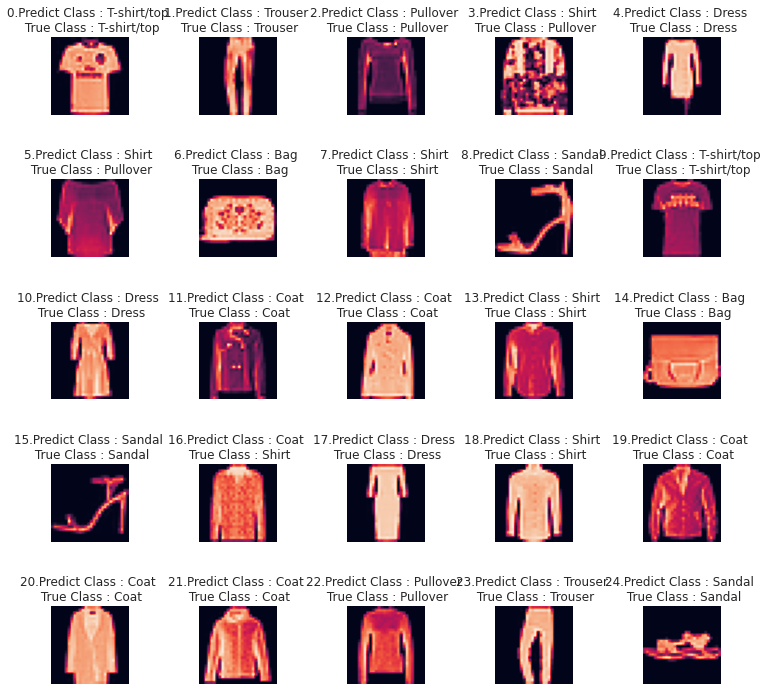

In [50]:
w_gird = 5
l_gird = 5

fig,axes = plt.subplots(l_gird,w_gird,figsize=(12,12))

axes = axes.ravel()

for i in np.arange(0,l_gird*w_gird):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f'{i}.Predict Class : {class_names[predict_class[i]]} \n True Class : {class_names[int(y_test[i])]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.9,hspace=0.7)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test,predict_class)

<AxesSubplot:>

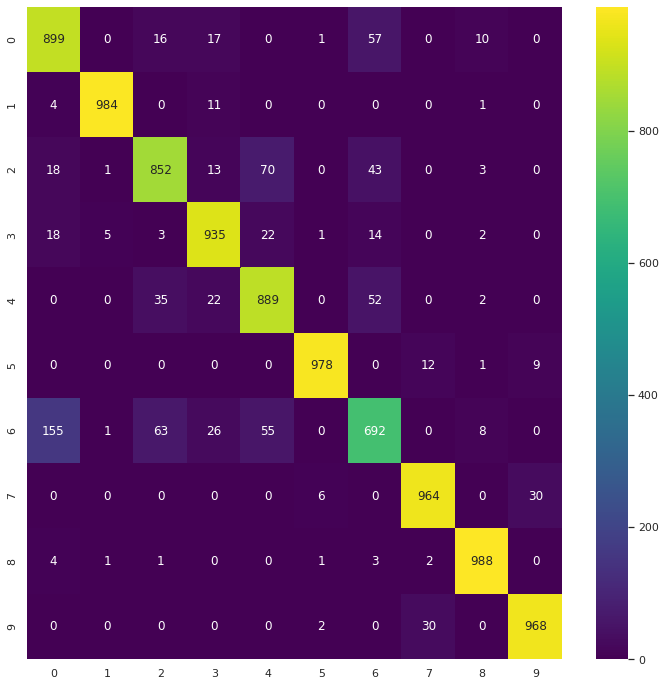

In [53]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,cmap='viridis',fmt='d')

In [54]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test,predict_class,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.90      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.85      0.86      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.86      0.89      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.80      0.69      0.74      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.97      0.99      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

